<a href="https://colab.research.google.com/github/finduglobe/Lecture-Studies/blob/master/Handwriting_Recog/w_GPU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy as sp
import warnings
import tensorflow as tf
import string
import datetime
warnings.filterwarnings("ignore")
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping

In [6]:
train = pd.read_csv('/content/written_name_train_v2.csv')
valid = pd.read_csv('/content/written_name_validation_v2.csv')

In [7]:
print(train.describe())
print(train.info())

               FILENAME IDENTITY
count            217758   217363
unique           217758    73965
top     TRAIN_00001.jpg    EMPTY
freq                  1     1215
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217758 entries, 0 to 217757
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   FILENAME  217758 non-null  object
 1   IDENTITY  217363 non-null  object
dtypes: object(2)
memory usage: 3.3+ MB
None


In [8]:
print(valid.describe())
print(valid.info())

                   FILENAME IDENTITY
count                 41370    41292
unique                41370    20227
top     VALIDATION_0001.jpg   THOMAS
freq                      1      219
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41370 entries, 0 to 41369
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   FILENAME  41370 non-null  object
 1   IDENTITY  41292 non-null  object
dtypes: object(2)
memory usage: 646.5+ KB
None


In [9]:
print(train.columns)
print(valid.columns)

Index(['FILENAME', 'IDENTITY'], dtype='object')
Index(['FILENAME', 'IDENTITY'], dtype='object')


In [10]:
print("Data types: \n{}".format(train.dtypes))
print("Data types: \n{}".format(valid.dtypes))

Data types: 
FILENAME    object
IDENTITY    object
dtype: object
Data types: 
FILENAME    object
IDENTITY    object
dtype: object


In [14]:
train.isnull().sum()
train=train.dropna()

In [15]:
valid.isnull().sum()
valid=valid.dropna()

In [17]:
print(train.shape)
print(valid.shape)

(217363, 2)
(41292, 2)


In [18]:
print(train.value_counts())

FILENAME          IDENTITY 
TRAIN_00001.jpg   BALTHAZAR    1
TRAIN_27406.jpg   VIALLET      1
TRAIN_27408.jpg   ELKORDE      1
TRAIN_27409.jpg   LEFEBURE     1
TRAIN_27410.jpg   BERARO       1
                              ..
TRAIN_156894.jpg  CELINE       1
TRAIN_156895.jpg  BENOIT       1
TRAIN_156896.jpg  ZITQUNI      1
TRAIN_156897.jpg  JOURNET      1
TRAIN_99999.jpg   DIMITRI      1
Length: 217363, dtype: int64


In [19]:
print(valid.value_counts())

FILENAME              IDENTITY        
VALIDATION_0001.jpg   BILEL               1
VALIDATION_34138.jpg  GLI                 1
VALIDATION_34158.jpg  GILLES              1
VALIDATION_34159.jpg  VINCENT             1
VALIDATION_3416.jpg   NATHAN              1
                                         ..
VALIDATION_21627.jpg  HAMEAU              1
VALIDATION_21628.jpg  FIGUERES CAUMONT    1
VALIDATION_21629.jpg  XU                  1
VALIDATION_2163.jpg   MENDES              1
VALIDATION_9999.jpg   BABIN-PELTIER       1
Length: 41292, dtype: int64


In [20]:
train.isnull().any()

FILENAME    False
IDENTITY    False
dtype: bool

In [21]:
valid.isnull().any()

FILENAME    False
IDENTITY    False
dtype: bool

In [22]:
list_a=list(train.columns)

In [23]:
list_cate=[]
for i in list_a:
    if train[i].dtype=='object':
        list_cate.append(i)

In [24]:
le=LabelEncoder()

In [25]:
for i in list_cate:
    train[i]=le.fit_transform(train[i])

In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 217363 entries, 0 to 217756
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype
---  ------    --------------   -----
 0   FILENAME  217363 non-null  int64
 1   IDENTITY  217363 non-null  int64
dtypes: int64(2)
memory usage: 5.0 MB


In [27]:
train.describe()

,FILENAME,IDENTITY
count,217363.000000,217363.000000
mean,108681.000000,36980.368853
std,62747.437618,21049.967829
min,0.000000,0.000000
25%,54340.500000,18787.000000
50%,108681.000000,38163.000000
75%,163021.500000,53518.000000
max,217362.000000,73964.000000


In [28]:
train

,FILENAME,IDENTITY
0,0,5019
1,1,65086
2,2,6967
3,3,40164
4,4,18424
...,...,...
217752,139279,11174
217753,139280,16538
217754,139281,60618
217755,139282,1440


In [29]:
X = train.drop('FILENAME',axis=1)
y = train['FILENAME']

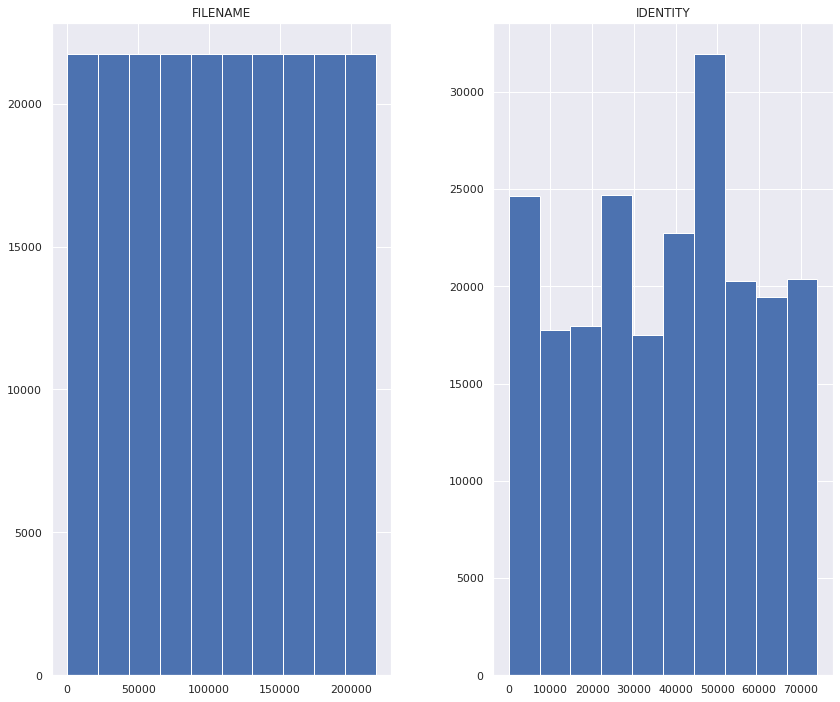

In [30]:
train.hist(figsize=(14,12))
plt.show()

In [31]:
train.corr()

,FILENAME,IDENTITY
FILENAME,1.000000,0.000304
IDENTITY,0.000304,1.000000


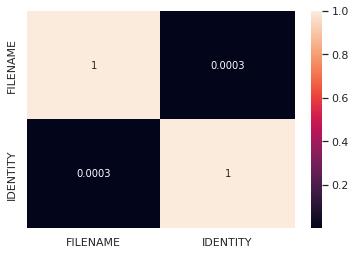

In [32]:
plt.figure(figsize = (6,4))

sns.heatmap(train.corr(), annot = True)

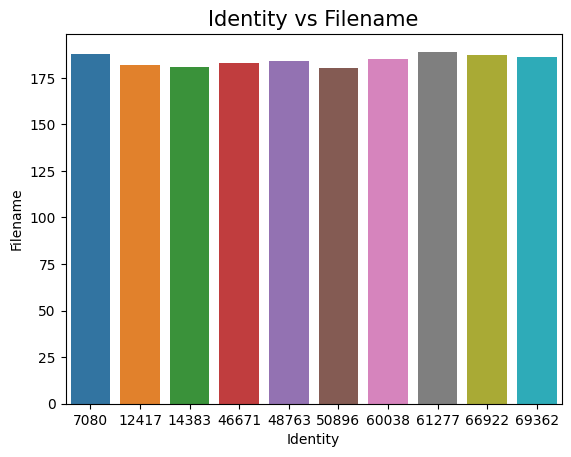

In [33]:
plt.style.use("default")
sns.barplot(x="IDENTITY", y="FILENAME",data=train[180:190])
plt.title("Identity vs Filename",fontsize=15)
plt.xlabel("Identity")
plt.ylabel("Filename")
plt.show()

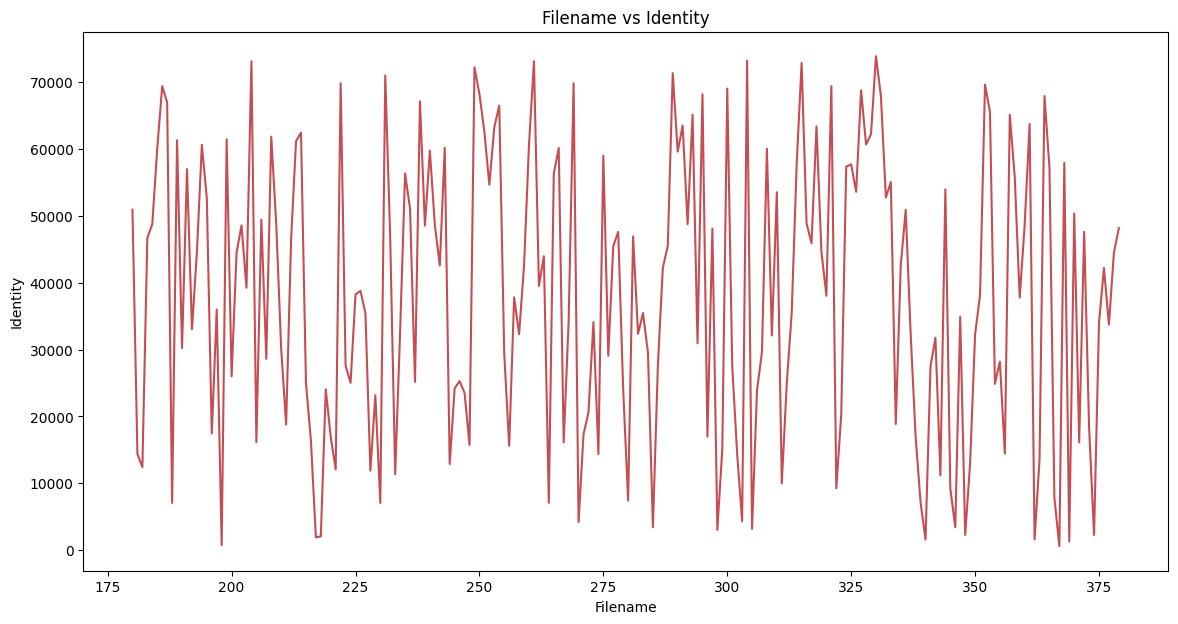

In [34]:
plt.style.use("default")
plt.figure(figsize=(14,7))
sns.lineplot(x = "FILENAME",y = "IDENTITY",data = train[180:380], color='r')
plt.title("Filename vs Identity")
plt.xlabel("Filename")
plt.ylabel("Identity")
plt.show()

In [35]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=12)

In [36]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

152154
65209
152154
65209


In [37]:
model = tf.keras.Sequential([
      tf.keras.layers.Dense(units=80,activation='relu',name = 'input_layer'),
      tf.keras.layers.Dense(units=60,activation='relu',name = 'dense_layer1'),
      tf.keras.layers.Dense(units=40,activation='relu',name = 'dense_layer2'),
      tf.keras.layers.Dense(units=1,name='Output_layer')
],name='Model') 


        
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',       
    metrics=['binary_accuracy'],
)


history = model.fit(X_train,y_train,batch_size=256,
    epochs=150,

                   )

Epoch 1/150
595/595 [==============================] - 10s 12ms/step - loss: 1677574.0000 - binary_accuracy: 6.5723e-06
Epoch 2/150
595/595 [==============================] - 4s 6ms/step - loss: 1677573.3750 - binary_accuracy: 6.5723e-06
Epoch 3/150
595/595 [==============================] - 4s 7ms/step - loss: 1677574.8750 - binary_accuracy: 6.5723e-06
Epoch 4/150
595/595 [==============================] - 4s 7ms/step - loss: 1677574.1250 - binary_accuracy: 6.5723e-06
Epoch 5/150
595/595 [==============================] - 4s 6ms/step - loss: 1677574.0000 - binary_accuracy: 6.5723e-06
Epoch 6/150
595/595 [==============================] - 3s 5ms/step - loss: 1677572.8750 - binary_accuracy: 6.5723e-06
Epoch 7/150
595/595 [==============================] - 4s 6ms/step - loss: 1677574.5000 - binary_accuracy: 6.5723e-06
Epoch 8/150
595/595 [==============================] - 3s 5ms/step - loss: 1677574.2500 - binary_accuracy: 6.5723e-06
Epoch 9/150
595/595 [==============================] -

In [39]:
y_pred = model.predict(X_test)
y_pred

array([[-5944.977  ],
       [ -133.81636],
       [-4248.1123 ],
       ...,
       [ -423.56592],
       [-1376.7288 ],
       [-1739.8912 ]], dtype=float32)

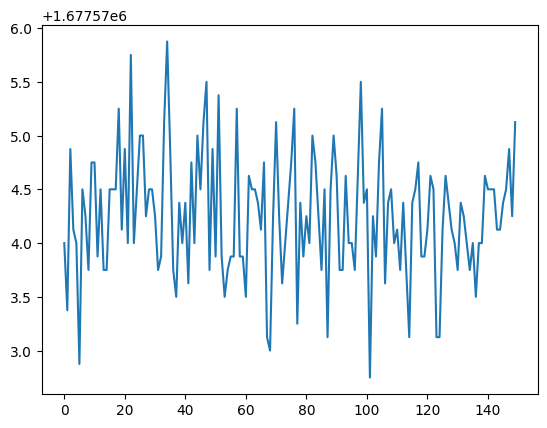

In [40]:
# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
history_df['loss'].plot()

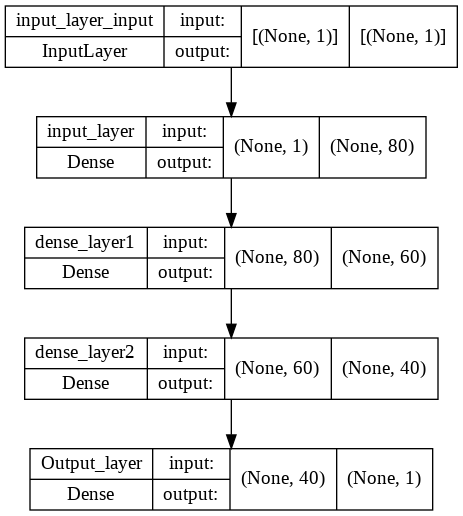

In [41]:
plot_model(model, show_shapes = True)

Best Validation Loss: 1677572.7500
Best Validation Accuracy: 0.0000


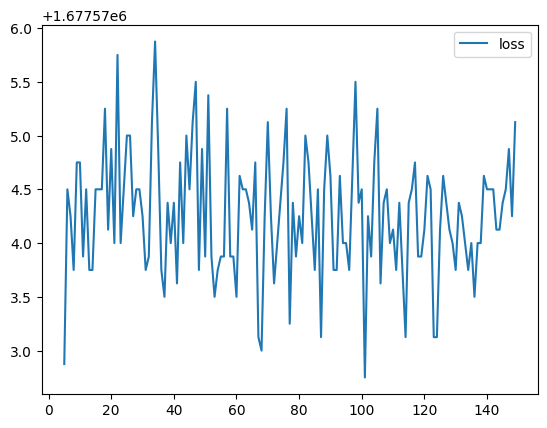

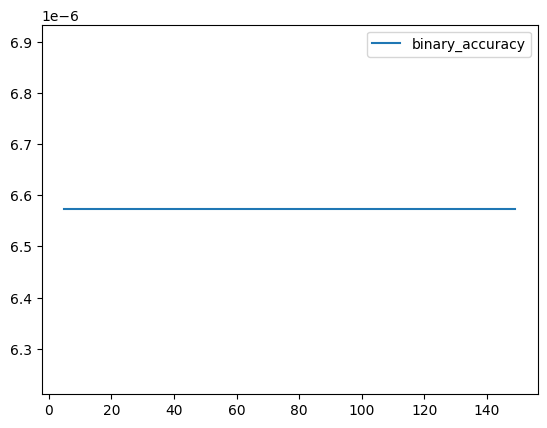

In [42]:
history_df = pd.DataFrame(history.history)
# Start the plot at epoch 5
history_df.loc[5:, ['loss']].plot()
history_df.loc[5:, ['binary_accuracy']].plot()
print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['loss'].min(), 
              history_df['binary_accuracy'].max()))

In [43]:
early_stopping = EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

In [44]:
model.evaluate(X_test,y_test)

2038/2038 [==============================] - 9s 4ms/step - loss: 1673654.6250 - binary_accuracy: 0.0000e+00


[1673654.625, 0.0]